In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from random import random,randint,seed,sample 
from sklearn.preprocessing import StandardScaler
import random as rn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import tree 

In [3]:
ab=pd.read_csv('/home/abraham/ML-ITAM/Den/Machine_Learning/abalone.csv')
ab.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
X=np.array(ab.iloc[:,1:9])
y=np.array(ab.iloc[:,0])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [5]:
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)

In [6]:
arbol=DecisionTreeClassifier()
arbol.fit(X_train,y_train)
predar=arbol.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predar))
print(confusion_matrix(y_test,predar))

             precision    recall  f1-score   support

          F       0.40      0.44      0.42       269
          I       0.65      0.66      0.65       254
          M       0.43      0.39      0.41       313

avg / total       0.49      0.49      0.49       836

[[118  39 112]
 [ 37 167  50]
 [139  51 123]]


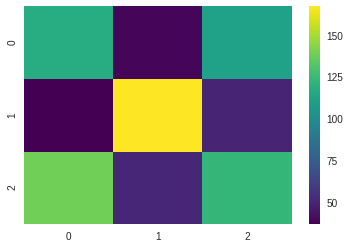

In [13]:
cm=confusion_matrix(y_test,predar)
sns.heatmap(cm,cmap='viridis')# font size

In [9]:
RF=RandomForestClassifier(criterion='gini', min_samples_split=2,n_estimators=1000)
RF.fit(X_train,y_train) 
pred=RF.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          F       0.45      0.41      0.43       269
          I       0.72      0.78      0.75       254
          M       0.47      0.48      0.48       313

avg / total       0.54      0.55      0.54       836

[[111  28 130]
 [ 19 197  38]
 [116  47 150]]


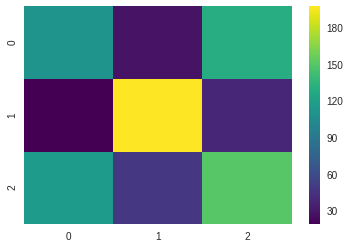

In [14]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,cmap='viridis')# font size

RF mejora casi todas las metricas con respecto al arbol

In [10]:
AB=AdaBoostClassifier()
AB.fit(X_train,y_train)
predab=AB.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predab))
print(confusion_matrix(y_test,predab))

             precision    recall  f1-score   support

          F       0.44      0.26      0.32       269
          I       0.63      0.78      0.69       254
          M       0.43      0.50      0.46       313

avg / total       0.49      0.50      0.49       836

[[ 69  41 159]
 [  7 198  49]
 [ 81  77 155]]
